In [8]:
from qiskit import *
from qiskit.visualization import *
from qiskit.transpiler import PassManager
#from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.providers.ibmq import least_busy
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.aqua.algorithms import QPE
from qiskit.aqua import QuantumInstance
from qiskit.aqua.components.initial_states import Custom
from qiskit.aqua import Operator
from qiskit.aqua.components.iqfts import Standard
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
IBMQ.load_accounts()

In [3]:
def matrixHamiltonian(tam, freq): #tam 4, estados 0 a 3
    h = 6.582119624 * 10**(-16)
    E = [h*freq*(i+1/2) for i in range(tam)]
    L = []
    for i in range(tam):
        L.append(list())
        for j in range(tam):
            if i==j: L[i].append(E[i])
            else: L[i].append(0)
    m = np.matrix(L)
    return m


In [39]:
def eigenvalues(m, q_bits, n_acillae):
    result_qpe = []
    for i in range(2**q_bits):
        op = Operator(matrix=m)
        eig_res = ExactEigensolver(op, k=2**q_bits)
        eig_res = eig_res.run()
        eigv = eig_res['eigvecs']

        state = Custom(q_bits, state_vector=eigv[i])

        num_time_slices = 50
        iqft = Standard(n_ancillae)

        qpe = QPE(op, state, iqft, num_time_slices, n_ancillae, expansion_mode='suzuki',
                  expansion_order=2, shallow_circuit_concat=True)

        backend = BasicAer.get_backend('qasm_simulator')
        quantum_instance = QuantumInstance(backend, shots=100, pass_manager=PassManager())
        result_qpe.append(qpe.run(quantum_instance))
    return result_qpe

In [77]:
q_bits = 2                             
m = matrixHamiltonian(2**q_bits, 10**16)
results = []
for i in range(7,12,2):
    results.append(eigenvalues(m, q_bits, i))
print(results)

BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

In [46]:
m.item(1,1)

9.873179436

In [75]:
energiasR = [m.item(i,i) for i in range(2**q_bits)]
energias = [abs(results[i][0]["energy"]) for i in range(2**q_bits)]

IndexError: list index out of range

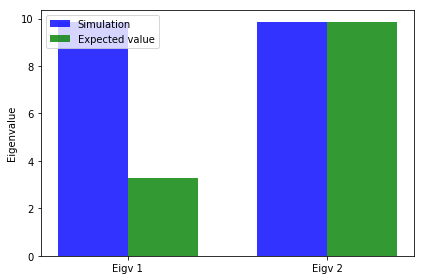

In [73]:
fig, ax = plt.subplots()

index = np.arange(2)

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, energias, bar_width, alpha=opacity,
    color='b',label='Simulation')

rects2 = plt.bar(index + bar_width, energiasR, bar_width, alpha=opacity, color='g',label='Expected value')

plt.xticks(index + bar_width/2, ('Eigv 1', 'Eigv 2', 'Eigv 3', 'Eigv 4'))
plt.xlabel('')
plt.ylabel('Eigenvalue')
plt.legend()


plt.tight_layout()
plt.show()

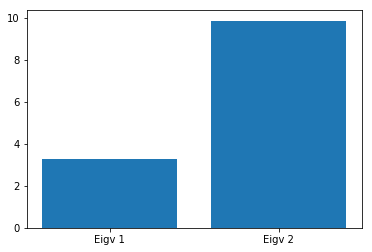

In [74]:
x = range(1,2**q_bits+1)
x = list(map(lambda roma: "Eigv "+str(roma), x))
plt.bar(x, energiasR, align = 'center', alpha = 1)
plt.show()